In [1]:
from google.colab import files
files.upload()


Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r

Loading dataset...
Dataset loaded successfully.
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Found 22 crop types.
Scaling features...
Training the Random Forest model...
Model training complete.

--- Model Evaluation ---
Model Accuracy: 99.55%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
 

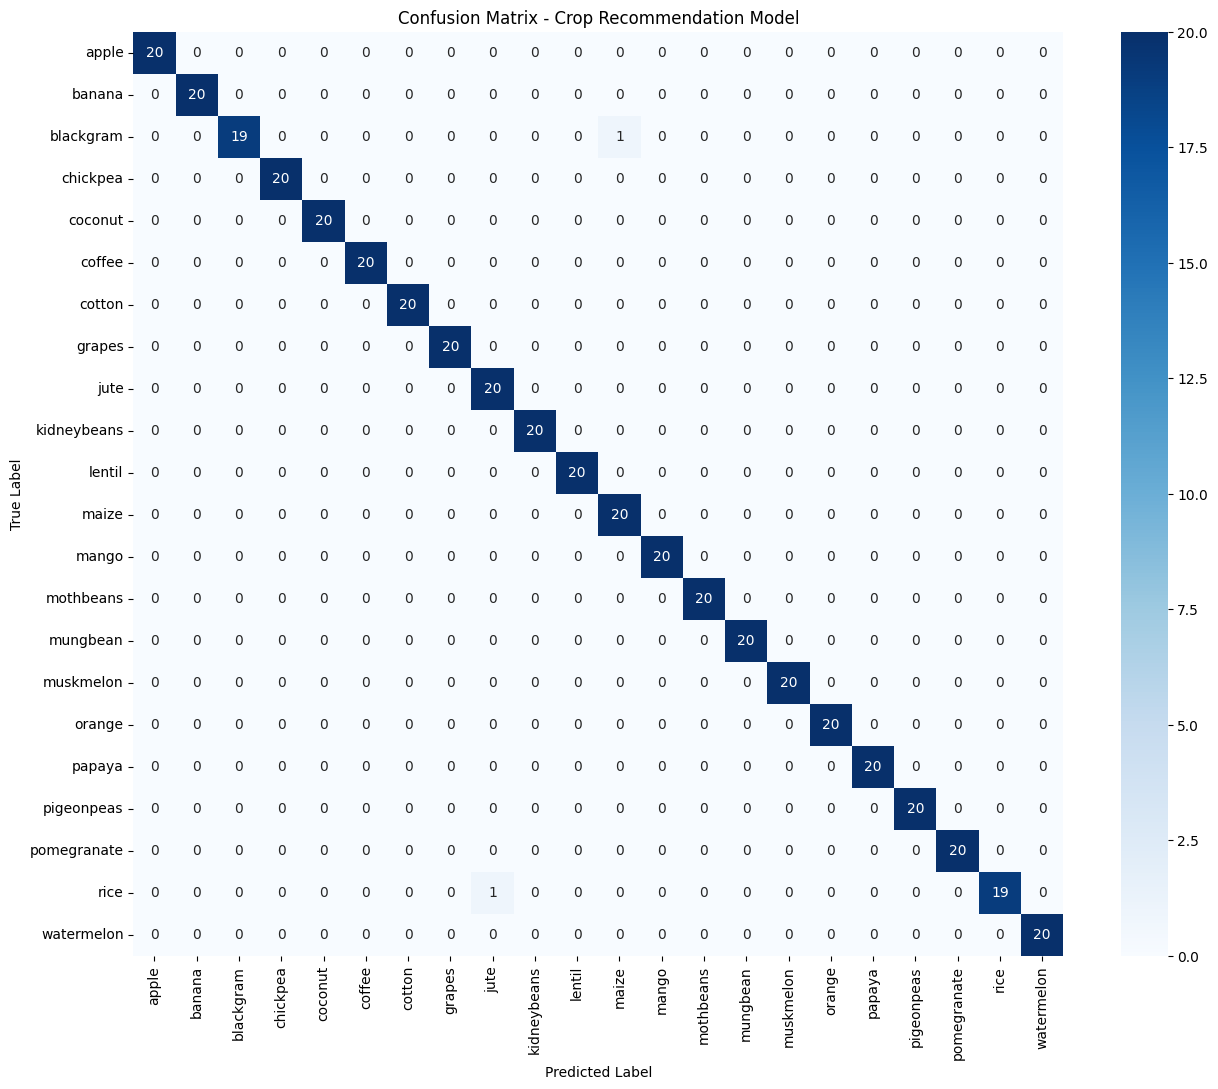

In [3]:
# --- AI for SDG 2: Crop Recommendation Engine ---
# This script builds a machine learning model to recommend the best crop
# for a given set of environmental conditions.

# --- 1. Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# --- 2. Load and Preprocess Data ---
print("Loading dataset...")
# Load the dataset (make sure 'Crop_recommendation.csv' is in the same directory or uploaded to Colab)
try:
    df = pd.read_csv('Crop_recommendation.csv')
except FileNotFoundError:
    print("Error: 'Crop_recommendation.csv' not found.")
    print("Please download it from Kaggle and upload it to your environment.")
    exit()

print("Dataset loaded successfully.")
print(df.head())

# Separate features (X) and the target label (y)
X = df.drop('label', axis=1)
y = df['label']

print(f"\nFound {len(y.unique())} crop types.")

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features using StandardScaler
# This ensures all features (like 'rainfall' and 'ph') are on the same scale
print("Scaling features...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 3. Train the Model ---
# We use a Random Forest Classifier, an excellent supervised learning algorithm
# for this type of problem.
print("Training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Evaluate the Model ---
print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the results with a Confusion Matrix
print("Generating confusion matrix visualization...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Crop Recommendation Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png') # Save the plot as a file
print("\n*** ACTION: Take a screenshot of the 'confusion_matrix.png' plot for your README! ***\n")
# plt.show() # Uncomment this if running in a notebook to display the plot

# --- 5. Make a Prediction (Project Demo) ---
print("\n--- Project Demo: Making a New Prediction ---")

# Let's create a new data point for a hypothetical farm
# Features: [N, P, K, temperature, humidity, ph, rainfall]
# Example: High Nitrogen, medium P/K, tropical/wet climate
new_data = [[90, 42, 43, 20.8, 82.0, 6.5, 202.9]]

# We must scale this new data just like we scaled the training data
new_data_scaled = scaler.transform(new_data)

# Make the prediction
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)

print(f"Input conditions (N, P, K, Temp, Humidity, pH, Rainfall): {new_data[0]}")
print(f"\n✅ Recommended Crop: {prediction[0]}")
print(f"Confidence: {probability.max() * 100:.2f}%")
